In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
valid = pd.read_csv("../data/valid.csv")

In [3]:
X_train, y_train = train.drop(["Chronic Medical Conditions", "Income"], axis=1), train["Chronic Medical Conditions"]

In [4]:
X_valid, y_valid = valid.drop(["Chronic Medical Conditions", "Income"], axis=1), valid["Chronic Medical Conditions"]
X_test, y_test = train.drop(["Chronic Medical Conditions", "Income"], axis=1), test["Chronic Medical Conditions"]

# Logistic regression

In [5]:
from sklearn.linear_model import LogisticRegression

## Without penalty

In [6]:
lr = LogisticRegression(penalty=None, max_iter=10_000, n_jobs=-1, random_state=42)

In [7]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=42)

In [8]:
y_pred_valid = lr.predict(X_valid)

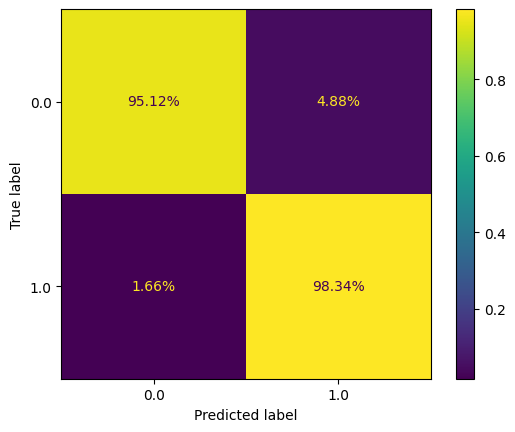

In [10]:
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [11]:
lr.coef_

array([[ 1.52195031e+01, -4.85464605e-01, -3.12260510e+00,
         2.46818479e-01,  1.52888104e-01, -7.60819886e-02,
        -4.73112707e-01,  1.96669852e-02,  9.52298772e-01,
        -3.71531809e-01,  1.39705242e-02]])

In [12]:
X_train.head()

,Income_log,Age,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness
0,0.064693,1.707128,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.585799,-0.385529,2.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0
2,0.166204,-1.597067,1.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0
3,-0.165435,1.321639,1.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0
4,1.047952,0.440520,2.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0


In [14]:
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     29622
         1.0       0.97      0.98      0.98     53132

    accuracy                           0.97     82754
   macro avg       0.97      0.97      0.97     82754
weighted avg       0.97      0.97      0.97     82754



# With L1 penalty

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


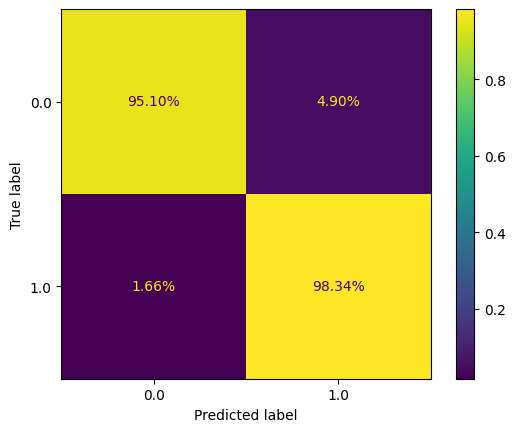

In [15]:
lr = LogisticRegression(penalty="l1", max_iter=10_000, n_jobs=-1, random_state=42, solver="liblinear")
lr.fit(X_train, y_train)
y_pred_valid = lr.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [16]:
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     29622
         1.0       0.97      0.98      0.98     53132

    accuracy                           0.97     82754
   macro avg       0.97      0.97      0.97     82754
weighted avg       0.97      0.97      0.97     82754



# With L2 penalty

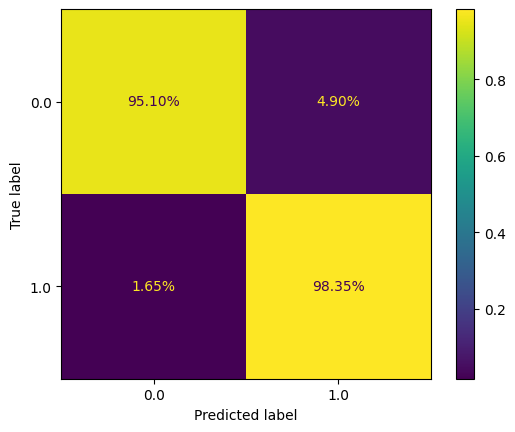

In [17]:
lr = LogisticRegression(penalty="l2", max_iter=10_000, n_jobs=-1, random_state=42)
lr.fit(X_train, y_train)
y_pred_valid = lr.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [18]:
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     29622
         1.0       0.97      0.98      0.98     53132

    accuracy                           0.97     82754
   macro avg       0.97      0.97      0.97     82754
weighted avg       0.97      0.97      0.97     82754



# Grid Search

Odrzucamy L1 penalty

In [30]:
gs = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        "penalty" : [None, "l2"],
        "solver" : ["lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
        "max_iter" : [100, 1000, 10_000]
    },
    cv=5, 
    n_jobs=-1
)

In [31]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000],
                         'penalty': [None, 'l2'],
                         'solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                    'sag', 'saga']})

In [32]:
gs.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

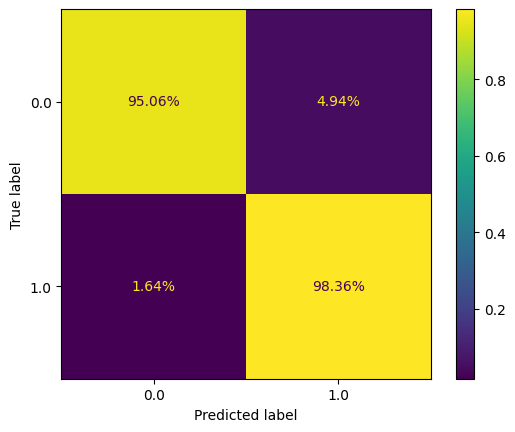

In [33]:
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [37]:
np.mean(y_pred_valid == y_valid)

np.float64(0.9718080092805181)

Za duże wartości max iteracji, robimy grid search z mniejszymi wartościami

In [38]:
gs = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        "penalty" : [None, "l2"],
        "solver" : ["lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
        "max_iter" : [20, 50, 100]
    },
    cv=5, 
    n_jobs=-1
)
gs.fit(X_train, y_train)
gs.best_params_

{'max_iter': 20, 'penalty': 'l2', 'solver': 'lbfgs'}

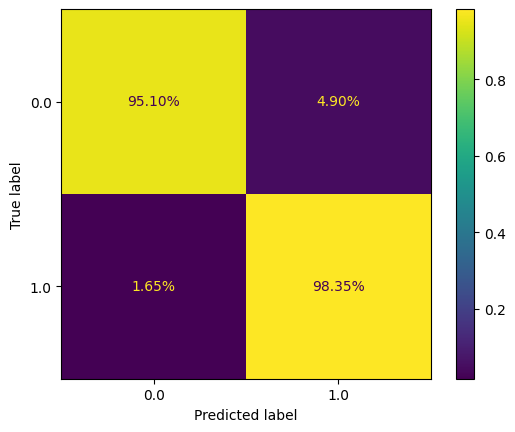

In [39]:
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [40]:
np.mean(y_pred_valid == y_valid)

np.float64(0.9718684293206371)

Ponownie za duże wartości max iteracji

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:431: ConvergenceWarning: Newton solver did not converge after 5 iterations.
  warnings.warn(


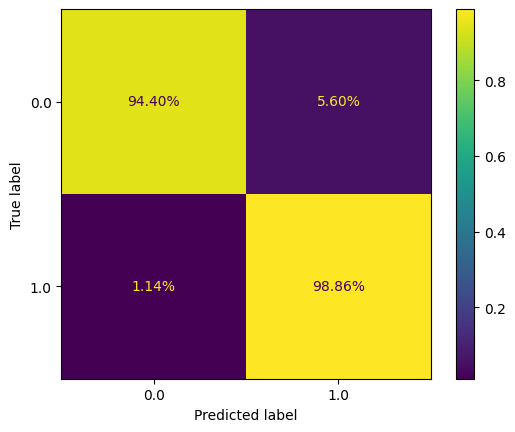

In [41]:
gs = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        "penalty" : [None, "l2"],
        "solver" : ["lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
        "max_iter" : [5, 10, 15, 20]
    },
    cv=5, 
    n_jobs=-1
)
gs.fit(X_train, y_train)

y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [42]:
np.mean(y_pred_valid == y_valid)

np.float64(0.9726538898421828)

In [43]:
gs.best_params_

{'max_iter': 5, 'penalty': None, 'solver': 'newton-cholesky'}

0.9726538898421828


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:431: ConvergenceWarning: Newton solver did not converge after 5 iterations.
  warnings.warn(


{'max_iter': 5, 'penalty': None, 'solver': 'newton-cholesky'}

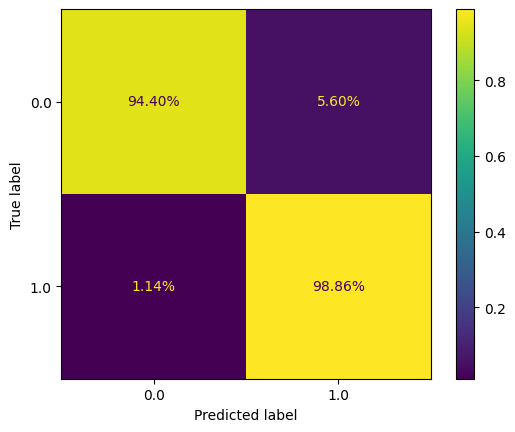

In [46]:
gs = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        "penalty" : [None, "l2"],
        "solver" : ["lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
        "max_iter" : list(range(1, 6))
    },
    cv=5, 
    n_jobs=-1
)
gs.fit(X_train, y_train)
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")
print(np.mean(y_pred_valid == y_valid))
gs.best_params_

Ponownie za duże wartości max iteracji

Accuracy = 0.9717959252724944


{'max_iter': 25, 'solver': 'liblinear'}

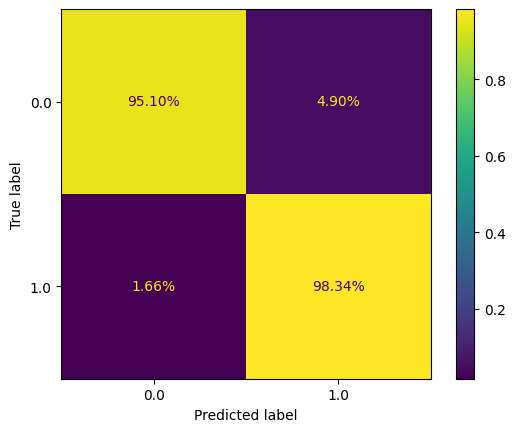

In [48]:
gs = GridSearchCV(
    estimator=LogisticRegression(penalty="l1"),
    param_grid={
        "solver" : ["liblinear", "saga"],
        "max_iter" : [5, 10, 25, 50, 100, 200]
    },
    cv=5, 
    n_jobs=-1
)
gs.fit(X_train, y_train)
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")
print(f"Accuracy = {np.mean(y_pred_valid == y_valid)}")
gs.best_params_

Dobieramy teraz l1 ratio

Accuracy = 0.9718925973366846


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'l1_ratio': np.float64(0.4), 'max_iter': 5}

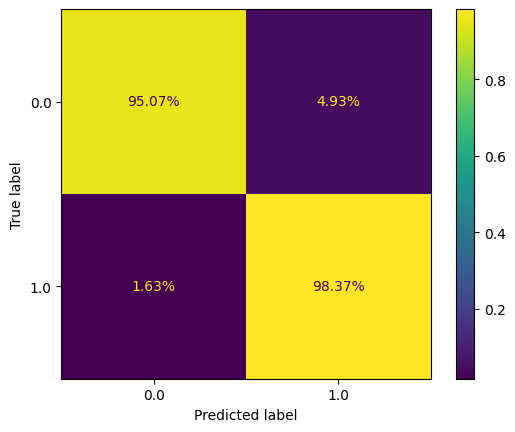

In [53]:
gs = GridSearchCV(
    estimator=LogisticRegression(solver="saga", penalty="elasticnet"),
    param_grid={
        "l1_ratio" : list(np.arange(0, 1, 0.05)),
        "max_iter" : [5, 10, 25, 50, 100, 200]
    },
    cv=5, 
    n_jobs=-1
)
gs.fit(X_train, y_train)
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")
print(f"Accuracy = {np.mean(y_pred_valid == y_valid)}")
gs.best_params_

Sprawdzamy dla mniejszych wartości max iteracji

Accuracy = 0.971711337216328


{'l1_ratio': np.float64(0.25), 'max_iter': 3}

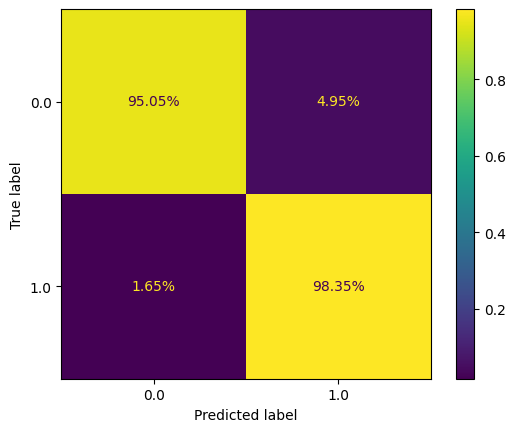

In [56]:
import warnings
warnings.filterwarnings('ignore')

gs = GridSearchCV(
    estimator=LogisticRegression(solver="saga", penalty="elasticnet"),
    param_grid={
        "l1_ratio" : list(np.arange(0, 1, 0.01)),
        "max_iter" : [1, 2, 3, 4, 5, 7, 10, 20, 50]
    },
    cv=5,
    n_jobs=-1
)
gs.fit(X_train, y_train)
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")
print(f"Accuracy = {np.mean(y_pred_valid == y_valid)}")
gs.best_params_

# KNeighbors Classifier

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        "n_neighbors" : list(range(1, 10, 1)),
        "weights" : ["uniform", "distance"],
        "metric" : ["cosine", "euclidean", "l1"]
    },
    cv=3,
    n_jobs=-1
)

In [4]:
X_train.shape

(248260, 11)

In [5]:
gs.fit(X_train[:30_000], y_train[:30_000])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.92586667 0.92586667 0.91586667 0.92586667 0.937      0.93576667
 0.93713333 0.93793333 0.94336667 0.94086667 0.94553333 0.9424
 0.9447     0.9431     0.94833333 0.9441     0.9458            nan
 0.9179     0.9179     0.90813333 0.9179     0.92973333 0.93133333
 0.93376667 0.93386667 0.93643333 0.93723333 0.94093333 0.93873333
 0.93836667 0.9401     0.94256667 0.9398     0.93876667 0.9403
 0.91363333 0.91363333 0.90816667 0.91363333 0.92546667 0.927
 0.93353333 0.92946667 0.9337     0.93393333 0.94       0.93563333
 0.93456667 0.93616667 0.94133333 0.93673333 0.93576667 0.93796667]
  warnings.warn(


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['cosine', 'euclidean', 'l1'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [10]:
best_model = gs.best_estimator_

In [11]:
best_model

KNeighborsClassifier(metric='cosine', n_neighbors=8)

In [12]:
best_model.weights

'uniform'

## Grid search

In [13]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        "n_neighbors" : list(range(1, 10, 1)),
        "weights" : ["uniform", "distance"]
    },
    cv=3,
    n_jobs=-1
)

In [14]:
gs.fit(X_train[:30_000], y_train[:30_000])

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [15]:
model = gs.best_estimator_

In [16]:
model

KNeighborsClassifier(n_neighbors=8)

In [17]:
model.weights

'uniform'

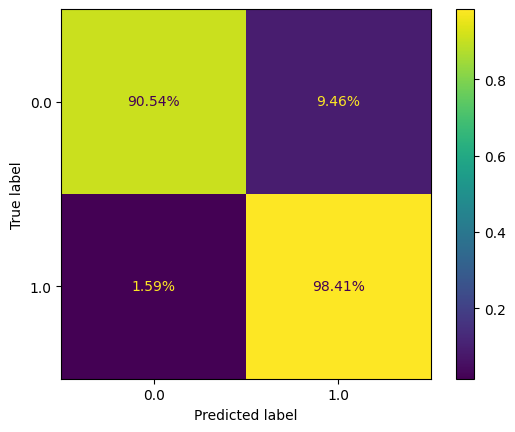

In [18]:
model = KNeighborsClassifier(n_neighbors=8, weights="uniform", n_jobs=-1)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

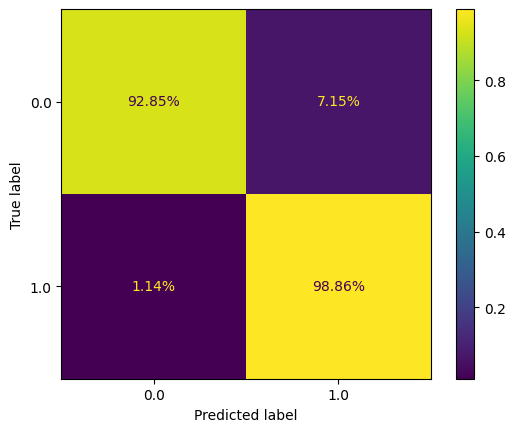

In [19]:
model = KNeighborsClassifier(n_neighbors=8, weights="uniform", n_jobs=-1)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [22]:
for n in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=n, weights="uniform")
    model.fit(X_train, y_train)
    y_pred_valid = model.predict(X_valid)
    print(f"accuracy {n} neighbours -> {np.mean(y_valid==y_pred_valid)}")

accuracy 1 neighbours -> 0.9553133383280566
accuracy 2 neighbours -> 0.946673272591053
accuracy 3 neighbours -> 0.9563767310341494
accuracy 4 neighbours -> 0.9560867148415787
accuracy 5 neighbours -> 0.9550354061435097
accuracy 6 neighbours -> 0.9563888150421732
accuracy 7 neighbours -> 0.9542016095898688
accuracy 8 neighbours -> 0.9559175387292457
accuracy 9 neighbours -> 0.9526186045387535


In [23]:
for n in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=n, weights="distance")
    model.fit(X_train, y_train)
    y_pred_valid = model.predict(X_valid)
    print(f"accuracy {n} neighbours -> {np.mean(y_valid==y_pred_valid)}")

accuracy 1 neighbours -> 0.9553133383280566
accuracy 2 neighbours -> 0.9553133383280566
accuracy 3 neighbours -> 0.9575005437803611
accuracy 4 neighbours -> 0.9586606085506441
accuracy 5 neighbours -> 0.9582135002537642
accuracy 6 neighbours -> 0.9588418686710009
accuracy 7 neighbours -> 0.9585156004543587
accuracy 8 neighbours -> 0.9584068443821446
accuracy 9 neighbours -> 0.9584068443821446


# DNN

In [3]:
X_train.shape

(248260, 11)

In [9]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="softmax"))

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [17]:
y_train.shape

(248260,)

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9364 - loss: 0.1982 - val_accuracy: 0.9728 - val_loss: 0.0631
Epoch 2/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9721 - loss: 0.0643 - val_accuracy: 0.9738 - val_loss: 0.0611
Epoch 3/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9729 - loss: 0.0626 - val_accuracy: 0.9742 - val_loss: 0.0599
Epoch 4/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9734 - loss: 0.0614 - val_accuracy: 0.9746 - val_loss: 0.0590
Epoch 5/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9737 - loss: 0.0604 - val_accuracy: 0.9753 - val_loss: 0.0581
Epoch 6/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9743 - loss: 0.0594 - val_accuracy: 0.9760 - val_loss: 0.0571
Epoch 7/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9748 - loss: 0.0584 - val_accuracy: 0.9763 - val_loss: 0.0562
Epoch 8/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9753 - loss: 0

In [15]:
y_pred_valid = (model.predict(X_valid) >= 0.5)

2587/2587 ━━━━━━━━━━━━━━━━━━━━ 2s 662us/step


array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [22]:
(y_pred_valid[:, 1] == y_valid).mean()

np.float64(0.9800734707687846)

In [23]:
y_pred_valid = y_pred_valid[:, 1]

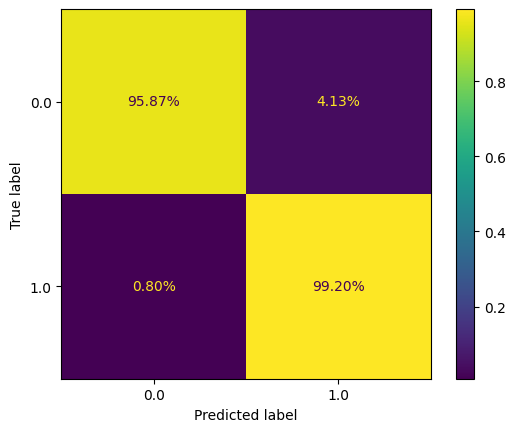

In [24]:
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [25]:
import pickle

In [26]:
with open("first_dnn.pkl", "wb") as file:
    pickle.dump(model, file)

In [33]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy", "f1_score"])

In [34]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9262 - f1_score: 0.4830 - loss: 0.1589 - val_accuracy: 0.9735 - val_f1_score: 0.5020 - val_loss: 0.0607
Epoch 2/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9730 - f1_score: 0.4994 - loss: 0.0616 - val_accuracy: 0.9753 - val_f1_score: 0.5006 - val_loss: 0.0572
Epoch 3/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9742 - f1_score: 0.4990 - loss: 0.0583 - val_accuracy: 0.9764 - val_f1_score: 0.5000 - val_loss: 0.0547
Epoch 4/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9753 - f1_score: 0.4987 - loss: 0.0557 - val_accuracy: 0.9771 - val_f1_score: 0.4998 - val_loss: 0.0529
Epoch 5/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9762 - f1_score: 0.4983 - loss: 0.0535 - val_accuracy: 0.9777 - val_f1_score: 0.4991 - val_loss: 0.0511
Epoch 6/30
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9770 - f1_score: 0.4979 - loss: 0.0515 - val_accuracy: 0.9780 - va

2587/2587 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


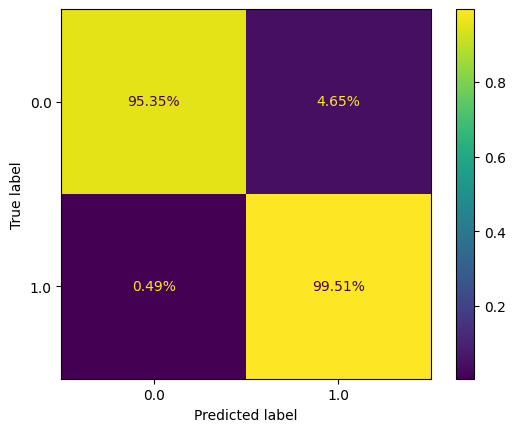

In [35]:
y_pred_valid = (model.predict(X_valid) >= 0.5)
y_pred_valid = y_pred_valid[:, 1]
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [36]:
with open("first_dnn2.pkl", "wb") as file:
    pickle.dump(model, file)

2587/2587 ━━━━━━━━━━━━━━━━━━━━ 2s 744us/step


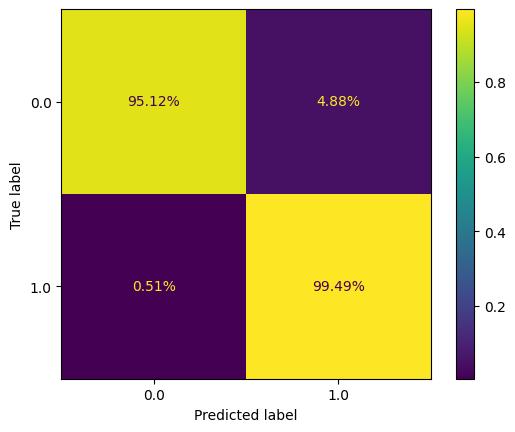

In [40]:
y_pred_valid = (model.predict(X_test) >= 0.5)
y_pred_valid = y_pred_valid[:, 1]
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [38]:
X_test.shape, y_test.shape

((248260, 11), (82754,))

# Decision Tree

In [1]:
from sklearn.tree import DecisionTreeClassifier

## First tree - no limitations

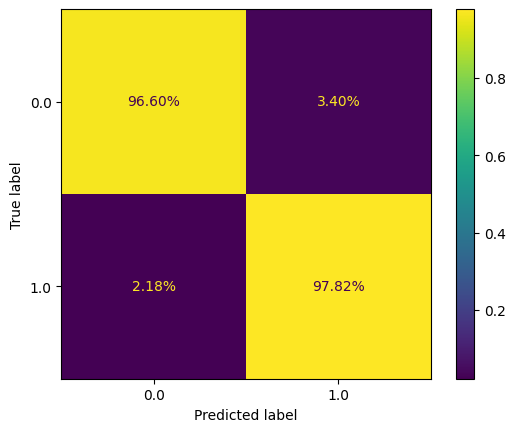

In [4]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [5]:
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     29622
         1.0       0.98      0.98      0.98     53132

    accuracy                           0.97     82754
   macro avg       0.97      0.97      0.97     82754
weighted avg       0.97      0.97      0.97     82754



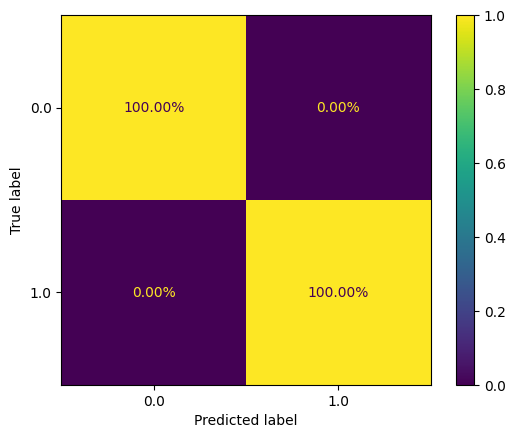

In [7]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=y_pred_valid, normalize="true", values_format=".2%")

Definitywnie overfitting

## GridSearch

In [9]:
gs = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        "criterion" : ["gini", "entropy", "log_loss"],
        "max_depth" : list(range(10, 100, 10)),
        "min_samples_split" : list(range(1, 20, 2)),
        "min_samples_leaf" : list(range(1, 20, 2))
    },
    cv=3,
    n_jobs=-1
)

In [10]:
gs.fit(X_train, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
810 fits failed out of a total of 8100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              19],
                         'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                               19]})

In [11]:
best_model = gs.best_estimator_

In [12]:
best_model

DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=7)

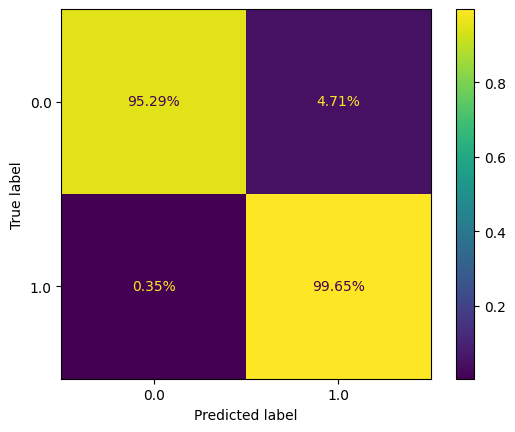

In [13]:
y_pred_valid = best_model.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [14]:
best_model.criterion

'gini'

In [15]:
np.mean(y_pred_valid==y_train)

np.float64(0.980882945299283)

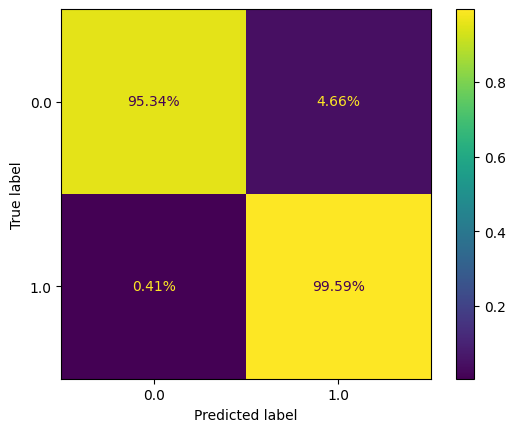

In [16]:
y_pred_valid = best_model.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [17]:
np.mean(y_pred_valid==y_valid)

np.float64(0.9806655871619498)

Zmniejszamy wartości max głębokości

In [18]:
gs = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        "criterion" : ["gini", "entropy", "log_loss"],
        "max_depth" : list(range(5, 20, 1)),
        "min_samples_split" : list(range(2, 14, 1)),
        "min_samples_leaf" : list(range(1, 5, 1))
    },
    cv=3
)

In [19]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13]})

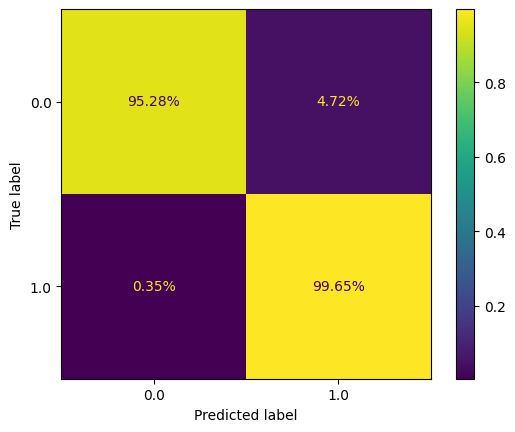

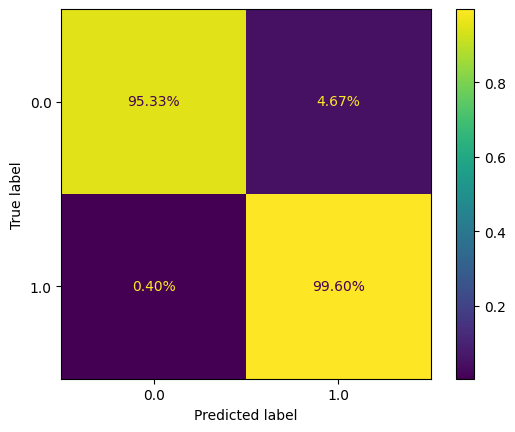

In [20]:
best_model = gs.best_estimator_

y_pred_valid = best_model.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=y_pred_valid, normalize="true", values_format=".2%")

y_pred_valid = best_model.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [21]:
y_pred_valid = best_model.predict(X_valid)
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     29622
         1.0       0.97      1.00      0.99     53132

    accuracy                           0.98     82754
   macro avg       0.98      0.97      0.98     82754
weighted avg       0.98      0.98      0.98     82754



In [22]:
np.mean(y_pred_valid == y_valid)

np.float64(0.9806897551779974)

In [3]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
valid = pd.read_csv("../data/valid.csv")

In [5]:
X_train, y_train = train.drop(["Chronic Medical Conditions", "Income"], axis=1), train["Chronic Medical Conditions"]

In [6]:
X_valid, y_valid = valid.drop(["Chronic Medical Conditions", "Income"], axis=1), valid["Chronic Medical Conditions"]
X_test, y_test = train.drop(["Chronic Medical Conditions", "Income"], axis=1), test["Chronic Medical Conditions"]

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Random forest

In [8]:
rf = RandomForestClassifier(n_estimators=100)

In [9]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred_valid = rf.predict(X_valid)

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

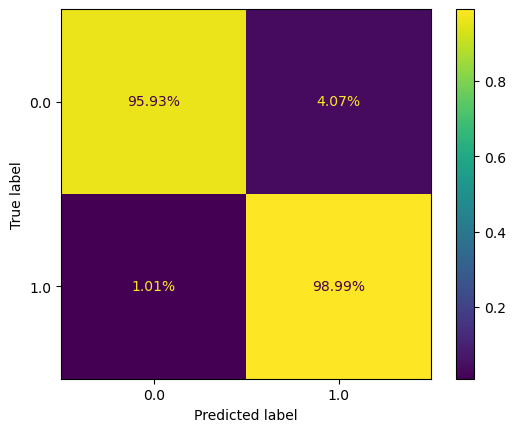

In [12]:
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [16]:
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     29622
         1.0       0.98      0.99      0.98     53132

    accuracy                           0.98     82754
   macro avg       0.98      0.97      0.98     82754
weighted avg       0.98      0.98      0.98     82754



## Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
gs = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid = {
        'n_estimators': list(range(200, 1000, 300)),
        'max_features': ['sqrt', 'log2'],
        "criterion" : ["gini", "entropy", "log_loss"],
    },
    cv=2,
    n_jobs=-1
)

In [19]:
gs.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500, 800]})

In [20]:
gs.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 800}

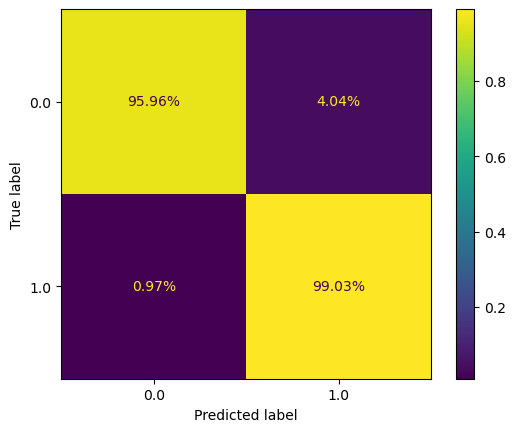

In [21]:
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [22]:
np.mean(y_pred_valid == y_valid)

np.float64(0.9793000942552625)

In [23]:
gs = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid = {
        'n_estimators': list(range(700, 1000, 100)),
        'max_features': ['sqrt', 'log2'],
        "criterion" : ["gini", "entropy", "log_loss"],
    },
    cv=2,
    n_jobs=-1
)
gs.fit(X_train, y_train)
gs.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 800}

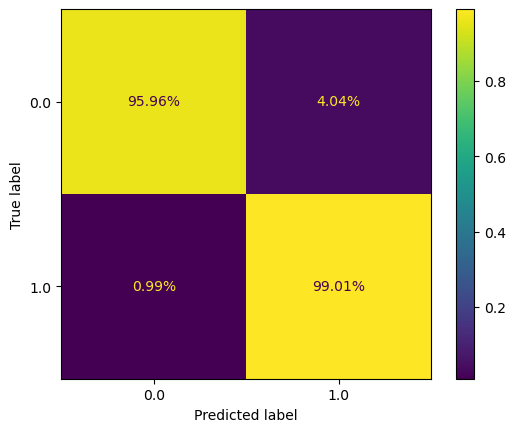

In [24]:
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [25]:
np.mean(y_pred_valid == y_valid)

np.float64(0.9792034221910724)

In [28]:
gs = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid = {
        'n_estimators': [800],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    cv=2,
    n_jobs=-1
)
gs.fit(X_train, y_train)
gs.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 800}

In [42]:
np.mean(y_pred_valid == y_valid)

np.float64(0.9726538898421828)

In [43]:
gs.best_params_

{'max_iter': 5, 'penalty': None, 'solver': 'newton-cholesky'}